 **INCISO A**

Mounted at /content/Drive
Columna: fixed acidity
  Percentil 25: 7.1
  Percentil 50 (Mediana): 7.9
  Percentil 75: 9.1
  Cuartiles (Q1, Q2, Q3): 7.1, 7.9, 9.1

Columna: volatile acidity
  Percentil 25: 0.3925
  Percentil 50 (Mediana): 0.52
  Percentil 75: 0.64
  Cuartiles (Q1, Q2, Q3): 0.3925, 0.52, 0.64

Columna: citric acid
  Percentil 25: 0.09
  Percentil 50 (Mediana): 0.25
  Percentil 75: 0.42
  Cuartiles (Q1, Q2, Q3): 0.09, 0.25, 0.42

Columna: residual sugar
  Percentil 25: 1.9
  Percentil 50 (Mediana): 2.2
  Percentil 75: 2.6
  Cuartiles (Q1, Q2, Q3): 1.9, 2.2, 2.6

Columna: chlorides
  Percentil 25: 0.07
  Percentil 50 (Mediana): 0.079
  Percentil 75: 0.09
  Cuartiles (Q1, Q2, Q3): 0.07, 0.079, 0.09

Columna: free sulfur dioxide
  Percentil 25: 7.0
  Percentil 50 (Mediana): 13.0
  Percentil 75: 21.0
  Cuartiles (Q1, Q2, Q3): 7.0, 13.0, 21.0

Columna: total sulfur dioxide
  Percentil 25: 21.0
  Percentil 50 (Mediana): 37.0
  Percentil 75: 61.0
  Cuartiles (Q1, Q2, Q3): 21.0, 37.

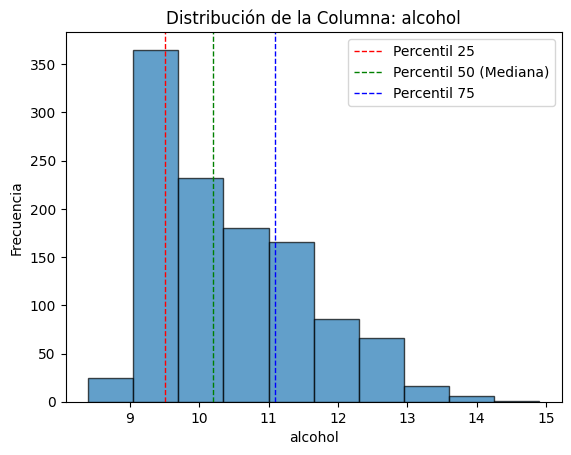

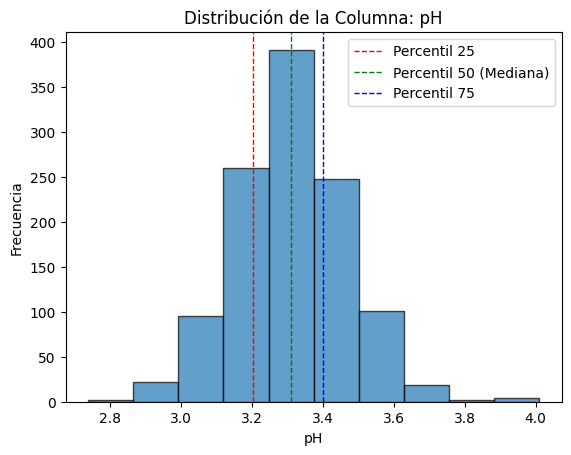

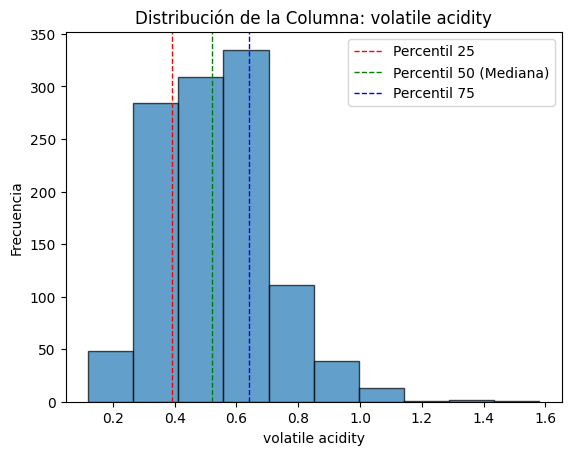

In [1]:
# Montar Google Drive
from google.colab import drive
drive.mount("/content/Drive")

# Cargar el dataset
import pandas as pd
data = pd.read_csv("/content/Drive/MyDrive/datos/Wine Quality Dataset.csv")

# Función para calcular el percentil manualmente
def calcular_percentil(datos, percentil):
    datos_ordenados = sorted(datos)
    k = (len(datos) - 1) * percentil / 100
    f = int(k)
    c = k - f
    if f + 1 < len(datos):
        return datos_ordenados[f] + (c * (datos_ordenados[f + 1] - datos_ordenados[f]))
    else:
        return datos_ordenados[f]

# Función para calcular cuartiles
def calcular_cuartiles(datos):
    q1 = calcular_percentil(datos, 25)
    q2 = calcular_percentil(datos, 50)
    q3 = calcular_percentil(datos, 75)
    return q1, q2, q3

# Calcular y mostrar percentiles y cuartiles para cada columna
for columna in data.columns:
    valores = data[columna].dropna().tolist()  # Convertir a lista, eliminando NaN
    percentil_25 = calcular_percentil(valores, 25)
    percentil_50 = calcular_percentil(valores, 50)
    percentil_75 = calcular_percentil(valores, 75)
    q1, q2, q3 = calcular_cuartiles(valores)
    print(f"Columna: {columna}")
    print(f"  Percentil 25: {percentil_25}")
    print(f"  Percentil 50 (Mediana): {percentil_50}")
    print(f"  Percentil 75: {percentil_75}")
    print(f"  Cuartiles (Q1, Q2, Q3): {q1}, {q2}, {q3}\n")

# Graficar distribuciones de columnas seleccionadas
import matplotlib.pyplot as plt

columnas_a_graficar = ['alcohol', 'pH', 'volatile acidity']  # Cambia a las columnas que desees
for columna in columnas_a_graficar:
    valores = data[columna].dropna().tolist()  # Convertir a lista, eliminando NaN
    plt.hist(valores, bins=10, alpha=0.7, edgecolor="black")
    plt.axvline(calcular_percentil(valores, 25), color='red', linestyle='dashed', linewidth=1, label="Percentil 25")
    plt.axvline(calcular_percentil(valores, 50), color='green', linestyle='dashed', linewidth=1, label="Percentil 50 (Mediana)")
    plt.axvline(calcular_percentil(valores, 75), color='blue', linestyle='dashed', linewidth=1, label="Percentil 75")
    plt.title(f"Distribución de la Columna: {columna}")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()


**INCISO B**

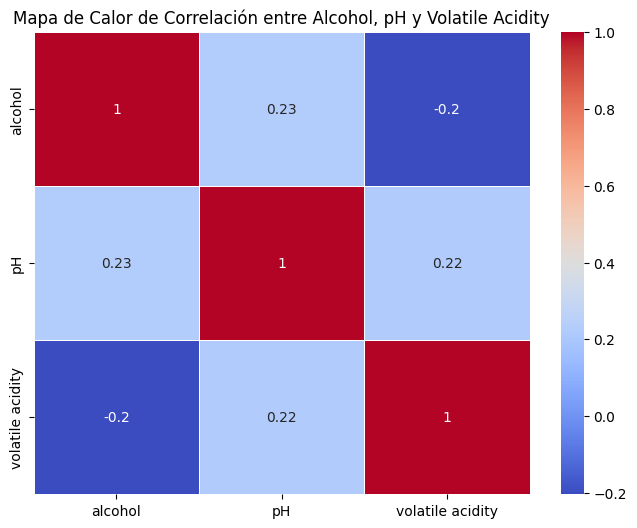

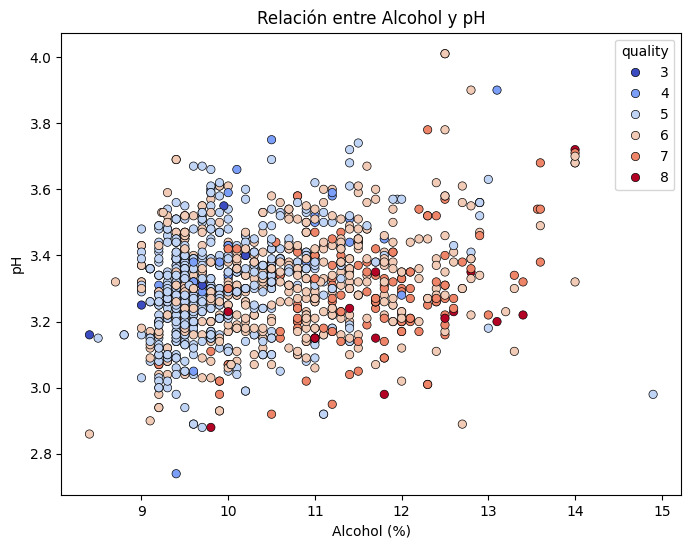

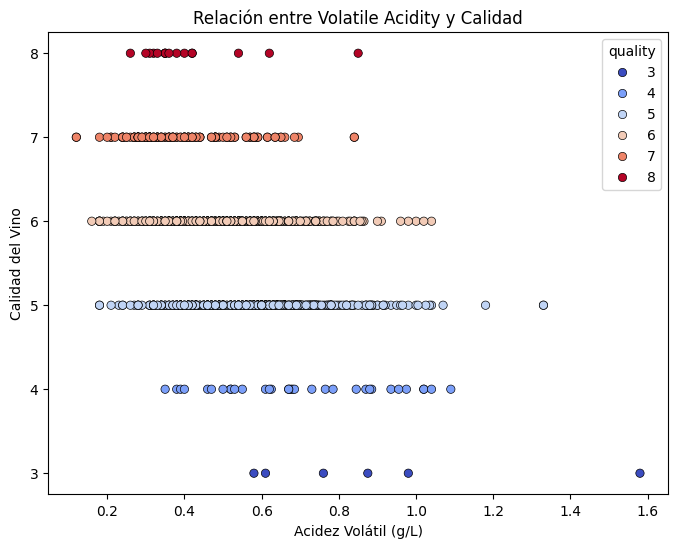

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor para ver la correlación entre las columnas seleccionadas
columnas = ['alcohol', 'pH', 'volatile acidity']
corr = data[columnas].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor de Correlación entre Alcohol, pH y Volatile Acidity")
plt.show()

# Gráfica de dispersión para analizar la relación entre alcohol y pH
plt.figure(figsize=(8,6))
sns.scatterplot(x='alcohol', y='pH', data=data, hue='quality', palette='coolwarm', edgecolor='black')
plt.title("Relación entre Alcohol y pH")
plt.xlabel("Alcohol (%)")
plt.ylabel("pH")
plt.show()

# Gráfica de dispersión para analizar la relación entre acidez volátil y calidad
plt.figure(figsize=(8,6))
sns.scatterplot(x='volatile acidity', y='quality', data=data, hue='quality', palette='coolwarm', edgecolor='black')
plt.title("Relación entre Volatile Acidity y Calidad")
plt.xlabel("Acidez Volátil (g/L)")
plt.ylabel("Calidad del Vino")
plt.show()


**INCISO C**

Columna: alcohol
  Media: 10.442111402741034
  Mediana: 10.2
  Moda: 9.5

Columna: pH
  Media: 3.3110148731408575
  Mediana: 3.31
  Moda: 3.3

Columna: volatile acidity
  Media: 0.5313385826771653
  Mediana: 0.52
  Moda: 0.5



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

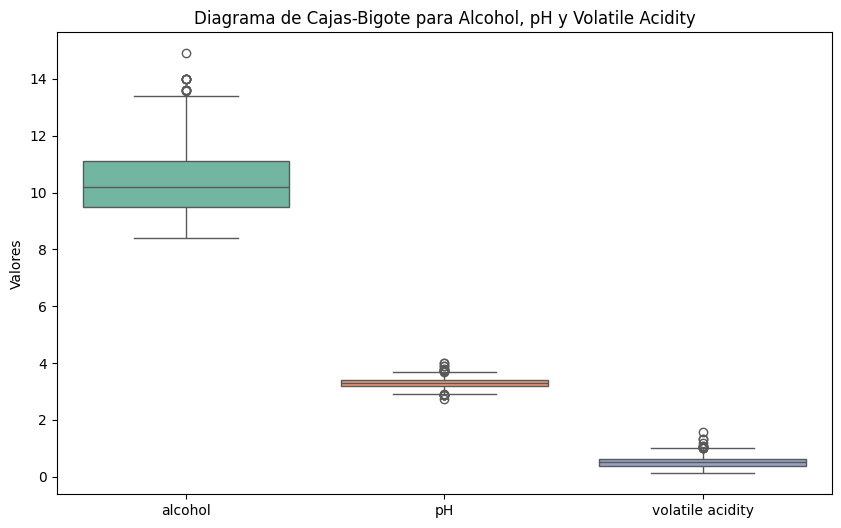

In [3]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calcular media, mediana y moda para las columnas seleccionadas
columnas_seleccionadas = ['alcohol', 'pH', 'volatile acidity']

for columna in columnas_seleccionadas:
    media = data[columna].mean()
    mediana = data[columna].median()
    moda = data[columna].mode()[0]  # Obteniendo la primera moda en caso de múltiples modas
    print(f"Columna: {columna}")
    print(f"  Media: {media}")
    print(f"  Mediana: {mediana}")
    print(f"  Moda: {moda}\n")

# Crear el diagrama de cajas-bigote (boxplot) para las columnas seleccionadas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[columnas_seleccionadas], palette="Set2")
plt.title("Diagrama de Cajas-Bigote para Alcohol, pH y Volatile Acidity")
plt.ylabel("Valores")
plt.show()
